# <center><b>Used Cars Price Prediction</b></center>

**Hello !** 

I am Sahala Josua and in this kernel we will explore Used Cars Price Prediction.

## <font color=palegreen>Abstract</font>

### I. <font color=#F0E68C>Introduction</font>

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, the cars are mostly bought on a lease basis, where there is an agreement between the buyer and seller. These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world.

Given the description of used cars, the prediction of used cars is not an easy task. There are a variety of features of a car like the age of the car, its make, the origin of the car (the original country of the manufacturer), its mileage (the number of mildes it has run) and its horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, style, braking system, the volume of its cylinders (measured in cc), acceleration, the number of doors, safety index, size, weight, height, paint color, consumer reviews, prestigious awards won by the car manufacturer.

Other options such as sound system, air conditioner, power steering, cosmic wheels, GPS navigator all may influence the price as well.

### II. <font color=#F0E68C>Import Library</font>

Firstly, we imported some basic Libraries.

In [41]:
# Importing necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

And Libraries for ML

In [42]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

### III. <font color=#F0E68C>Load Data</font>

Dataset from Data Mart Final Project Sahala Josua for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [43]:
train_data = pd.read_csv('D:/STUDY/G2Academy - Bootcamp Data Expert/FINAL PROJECT/FINAL/Data Science/data/data_train.csv')
test_data = pd.read_csv('D:/STUDY/G2Academy - Bootcamp Data Expert/FINAL PROJECT/FINAL/Data Science/data/data_test.csv')

In [44]:
def format_float(value):
    return f'{value:,.2f}'

pd.options.display.float_format = format_float

In [45]:
train_data

,order_id,brand,model,transmisi,power,engine,door,seats,fuel_type,color,mileage,year,province,price
0,58800,Toyota,Yaris,Automatic,106,1496 cc,5,5,Pertamax,Merah,17500,2020,DKI JAKARTA,"255,000,000.00"
1,137599,Ford,Everest,Automatic,141,2499 cc,5,7,Solar,Hitam,112500,2012,JAWA BARAT,"198,000,000.00"
2,21859,Chevrolet,Trax,Automatic,138,1364 cc,5,5,Pertamax,Orange,82500,2018,DKI JAKARTA,"216,000,000.00"
3,85816,Honda,Jazz,Automatic,118,1497 cc,5,5,Pertamax,Putih,77500,2019,DKI JAKARTA,"252,000,000.00"
4,122577,Mitsubishi,Xpander,Automatic,103,1499 cc,5,7,Pertamax,Putih,82500,2017,JAWA BARAT,"232,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105529,130366,Daihatsu,Terios,Automatic,107,1495 cc,5,7,Pertamax,Putih,52500,2013,DKI JAKARTA,"128,000,000.00"
105530,92304,Honda,Mobilio,Automatic,116,1496 cc,5,7,Pertamax,Hitam,24000,2018,JAWA BARAT,"205,000,000.00"
105531,6619,Honda,CR-V,Automatic,187,2354 cc,5,5,Pertamax,Putih,97500,2014,DKI JAKARTA,"238,000,000.00"
105532,90431,Suzuki,Ertiga,Automatic,94,1373 cc,5,7,Pertamax,Putih,87500,2015,DKI JAKARTA,"149,000,000.00"


In [46]:
test_data

,order_id,brand,model,transmisi,power,engine,door,seats,fuel_type,color,mileage,year,province
0,80574,Mitsubishi,Xpander,Automatic,103,1499 cc,5,7,Pertamax,Putih,67500,2017,BANTEN
1,45369,Toyota,Avanza,Manual,103,1496 cc,5,7,Pertamax,Hitam,97500,2016,JAWA BARAT
2,250,Hyundai,i10,Manual,63,1086 cc,5,5,Pertamax,Marun,112500,2010,BANTEN
3,7498,Toyota,Rush,Automatic,103,1496 cc,5,7,Pertamax,Putih,12500,2019,DKI JAKARTA
4,31917,Honda,CR-V,Automatic,187,1498 cc,5,7,Pertamax,Hitam,12500,2020,DKI JAKARTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,88350,Honda,CR-V,Automatic,153,1997 cc,5,5,Pertamax,Putih,82500,2014,DKI JAKARTA
45203,117623,Suzuki,Ertiga,Automatic,103,1462 cc,5,7,Pertamax,Abu-abu,27500,2019,JAWA BARAT
45204,62892,BMW,X1,Automatic,150,1995 cc,5,5,Pertamax,Putih,72500,2010,BANTEN
45205,139076,Daihatsu,Gran Max,Manual,87,1298 cc,5,2,Pertamax,Putih,87782,2013,DKI JAKARTA


### IV. <font color=#F0E68C>Data Understanding</font>

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105534 entries, 0 to 105533
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   105534 non-null  int64  
 1   brand      105534 non-null  object 
 2   model      105534 non-null  object 
 3   transmisi  105534 non-null  object 
 4   power      105534 non-null  int64  
 5   engine     105534 non-null  object 
 6   door       105534 non-null  int64  
 7   seats      105534 non-null  int64  
 8   fuel_type  105534 non-null  object 
 9   color      105534 non-null  object 
 10  mileage    105534 non-null  int64  
 11  year       105534 non-null  int64  
 12  province   105534 non-null  object 
 13  price      105534 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 11.3+ MB


In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   order_id   45207 non-null  int64 
 1   brand      45207 non-null  object
 2   model      45207 non-null  object
 3   transmisi  45207 non-null  object
 4   power      45207 non-null  int64 
 5   engine     45207 non-null  object
 6   door       45207 non-null  int64 
 7   seats      45207 non-null  int64 
 8   fuel_type  45207 non-null  object
 9   color      45207 non-null  object
 10  mileage    45207 non-null  int64 
 11  year       45207 non-null  int64 
 12  province   45207 non-null  object
dtypes: int64(6), object(7)
memory usage: 4.5+ MB


In [49]:
train_data.describe()

,order_id,power,door,seats,mileage,year,price
count,"105,534.00","105,534.00","105,534.00","105,534.00","105,534.00","105,534.00","105,534.00"
mean,"75,658.91",130.56,4.85,6.09,"53,545.12","2,017.02","312,643,295.06"
std,"43,680.89",50.62,0.51,1.16,"46,143.09",3.36,"362,152,223.38"
min,1.00,16.00,2.00,2.00,0.00,"1,958.00","1,555.00"
25%,"37,850.25",103.00,5.00,5.00,"27,000.00","2,016.00","155,000,000.00"
50%,"75,597.50",115.00,5.00,7.00,"47,500.00","2,018.00","220,000,000.00"
75%,"113,409.50",149.00,5.00,7.00,"72,500.00","2,019.00","350,000,000.00"
max,"151,498.00",770.00,5.00,26.00,"5,000,000.00","2,022.00","19,900,000,000.00"


In [50]:
test_data.describe()

,order_id,power,door,seats,mileage,year
count,"45,207.00","45,207.00","45,207.00","45,207.00","45,207.00","45,207.00"
mean,"76,012.25",130.53,4.85,6.09,"53,378.69","2,017.03"
std,"43,841.22",50.51,0.51,1.18,"38,185.72",3.31
min,2.00,50.00,2.00,2.00,0.00,"1,974.00"
25%,"37,994.00",103.00,5.00,5.00,"27,000.00","2,016.00"
50%,"76,172.00",115.00,5.00,7.00,"47,500.00","2,018.00"
75%,"114,143.00",149.00,5.00,7.00,"72,500.00","2,019.00"
max,"151,496.00",711.00,5.00,29.00,"1,231,231.00","2,022.00"


In [51]:
train_data.shape

(105534, 14)

In [52]:
test_data.shape

(45207, 13)

In [53]:
train_data.isnull().sum()

order_id     0
brand        0
model        0
transmisi    0
power        0
engine       0
door         0
seats        0
fuel_type    0
color        0
mileage      0
year         0
province     0
price        0
dtype: int64

In [54]:
test_data.isnull().sum()

order_id     0
brand        0
model        0
transmisi    0
power        0
engine       0
door         0
seats        0
fuel_type    0
color        0
mileage      0
year         0
province     0
dtype: int64

### V. <font color=#F0E68C>Data Preprocessing</font>

Process of converting data from one format to another, typically from the format of a source system into the required format of a destination system

In [55]:
train_data['engine'] = train_data['engine'].str.replace(' cc','')
train_data['cars'] = train_data[['brand', 'model']].apply(lambda x: ' '.join(x), axis =1)
train_data['prices'] = (train_data['price']/1000000).apply(lambda x: '{:,.2f}'.format(x))
train_data = train_data.drop(columns=['brand', 'model', 'price', 'order_id'])
train_data['prices'] = train_data['prices'].str.replace(',','')
train_data

,transmisi,power,engine,door,seats,fuel_type,color,mileage,year,province,cars,prices
0,Automatic,106,1496,5,5,Pertamax,Merah,17500,2020,DKI JAKARTA,Toyota Yaris,255.00
1,Automatic,141,2499,5,7,Solar,Hitam,112500,2012,JAWA BARAT,Ford Everest,198.00
2,Automatic,138,1364,5,5,Pertamax,Orange,82500,2018,DKI JAKARTA,Chevrolet Trax,216.00
3,Automatic,118,1497,5,5,Pertamax,Putih,77500,2019,DKI JAKARTA,Honda Jazz,252.00
4,Automatic,103,1499,5,7,Pertamax,Putih,82500,2017,JAWA BARAT,Mitsubishi Xpander,232.00
...,...,...,...,...,...,...,...,...,...,...,...,...
105529,Automatic,107,1495,5,7,Pertamax,Putih,52500,2013,DKI JAKARTA,Daihatsu Terios,128.00
105530,Automatic,116,1496,5,7,Pertamax,Hitam,24000,2018,JAWA BARAT,Honda Mobilio,205.00
105531,Automatic,187,2354,5,5,Pertamax,Putih,97500,2014,DKI JAKARTA,Honda CR-V,238.00
105532,Automatic,94,1373,5,7,Pertamax,Putih,87500,2015,DKI JAKARTA,Suzuki Ertiga,149.00


In [56]:
test_data['engine'] = test_data['engine'].str.replace(' cc','')
test_data['cars'] = test_data[['brand', 'model']].apply(lambda x: ' '.join(x), axis =1)
test_data = test_data.drop(columns=['brand', 'model', 'order_id'])
test_data

,transmisi,power,engine,door,seats,fuel_type,color,mileage,year,province,cars
0,Automatic,103,1499,5,7,Pertamax,Putih,67500,2017,BANTEN,Mitsubishi Xpander
1,Manual,103,1496,5,7,Pertamax,Hitam,97500,2016,JAWA BARAT,Toyota Avanza
2,Manual,63,1086,5,5,Pertamax,Marun,112500,2010,BANTEN,Hyundai i10
3,Automatic,103,1496,5,7,Pertamax,Putih,12500,2019,DKI JAKARTA,Toyota Rush
4,Automatic,187,1498,5,7,Pertamax,Hitam,12500,2020,DKI JAKARTA,Honda CR-V
...,...,...,...,...,...,...,...,...,...,...,...
45202,Automatic,153,1997,5,5,Pertamax,Putih,82500,2014,DKI JAKARTA,Honda CR-V
45203,Automatic,103,1462,5,7,Pertamax,Abu-abu,27500,2019,JAWA BARAT,Suzuki Ertiga
45204,Automatic,150,1995,5,5,Pertamax,Putih,72500,2010,BANTEN,BMW X1
45205,Manual,87,1298,5,2,Pertamax,Putih,87782,2013,DKI JAKARTA,Daihatsu Gran Max


In [57]:
train_data['engine'] = pd.to_numeric(train_data.engine, errors="ignore")
train_data['seats'] = train_data['seats'].astype(float)
train_data['door'] = train_data['door'].astype(float)
train_data['power'] = train_data['power'].astype(float)
train_data['prices'] = train_data['prices'].astype(float)

test_data['engine'] = pd.to_numeric(test_data.engine, errors="ignore")
test_data['seats'] = test_data['seats'].astype(float)
test_data['door'] = test_data['door'].astype(float)
test_data['power'] = test_data['power'].astype(float)

In [58]:
data_train = train_data.dropna(how='any')
data_test  = test_data.dropna(how='any')

In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105529 entries, 0 to 105533
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   transmisi  105529 non-null  object 
 1   power      105529 non-null  float64
 2   engine     105529 non-null  float64
 3   door       105529 non-null  float64
 4   seats      105529 non-null  float64
 5   fuel_type  105529 non-null  object 
 6   color      105529 non-null  object 
 7   mileage    105529 non-null  int64  
 8   year       105529 non-null  int64  
 9   province   105529 non-null  object 
 10  cars       105529 non-null  object 
 11  prices     105529 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 10.5+ MB


In [60]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45206
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   transmisi  45205 non-null  object 
 1   power      45205 non-null  float64
 2   engine     45205 non-null  float64
 3   door       45205 non-null  float64
 4   seats      45205 non-null  float64
 5   fuel_type  45205 non-null  object 
 6   color      45205 non-null  object 
 7   mileage    45205 non-null  int64  
 8   year       45205 non-null  int64  
 9   province   45205 non-null  object 
 10  cars       45205 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.1+ MB


### VI. <font color=#F0E68C>Transformasi Data</font>

Mapping the categorical variables with the integers.

In [61]:
import copy
df_train=copy.deepcopy(data_train)

cols=np.array(data_train.columns[data_train.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
df_train.drop(columns=cols,inplace=True)

In [62]:
import copy
df_test=copy.deepcopy(data_test)

cols=np.array(data_test.columns[data_test.dtypes != object])
for i in df_test.columns:
    if i not in cols:
        df_test[i]=df_test[i].map(str)
df_test.drop(columns=cols,inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data_train.columns[data_train.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
final_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
final_train[cols] = data_train[cols]

In [64]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data_test.columns[data_test.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
final_test = df_test.apply(lambda x: d[x.name].fit_transform(x))
final_test[cols] = data_test[cols]

In [65]:
final_train.head(5)

,transmisi,fuel_type,color,province,cars,power,engine,door,seats,mileage,year,prices
0,0,2,9,2,524,106.00,"1,496.00",5.00,5.00,17500,2020,255.00
1,0,6,5,4,118,141.00,"2,499.00",5.00,7.00,112500,2012,198.00
2,0,2,10,2,76,138.00,"1,364.00",5.00,5.00,82500,2018,216.00
3,0,2,11,2,138,118.00,"1,497.00",5.00,5.00,77500,2019,252.00
4,0,2,11,4,392,103.00,"1,499.00",5.00,7.00,82500,2017,232.00


In [66]:
final_test.head(5)

,transmisi,fuel_type,color,province,cars,power,engine,door,seats,mileage,year
0,0,2,11,1,332,103.00,"1,499.00",5.00,7.00,67500,2017
1,1,2,5,5,411,103.00,"1,496.00",5.00,7.00,97500,2016
2,1,2,8,1,131,63.00,"1,086.00",5.00,5.00,112500,2010
3,0,2,11,2,441,103.00,"1,496.00",5.00,7.00,12500,2019
4,0,2,5,2,104,187.00,"1,498.00",5.00,7.00,12500,2020


### VII. <font color=#F0E68C>Exploration Data Analysis (EDA)</font>

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target feature.

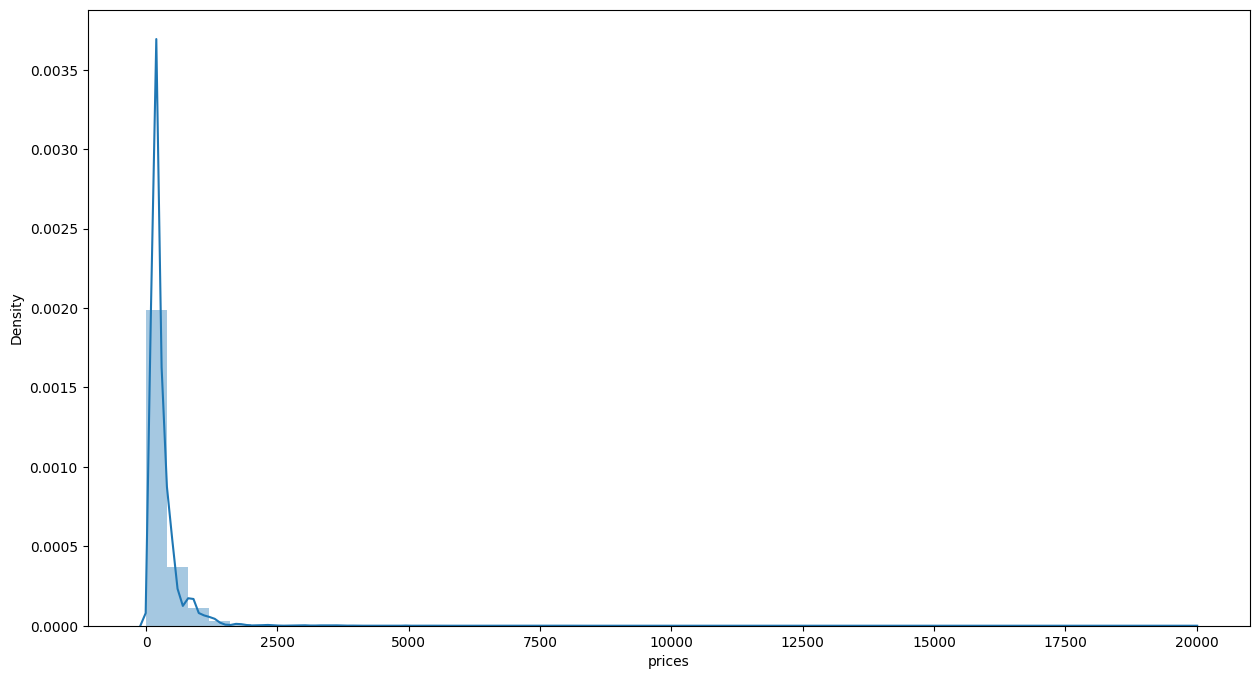

In [67]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data_train['prices'])
plt.show()

In [68]:
var_p = 'province'
data_train[var_p].value_counts()

DKI JAKARTA            53969
JAWA BARAT             32305
BANTEN                 10907
JAWA TIMUR              6647
JAWA TENGAH              837
SUMATERA UTARA           300
KALIMANTAN BARAT         210
BALI                     124
SUMATERA SELATAN          54
LAMPUNG                   38
SULAWESI SELATAN          36
RIAU                      34
KALIMANTAN TIMUR          23
KALIMANTAN SELATAN        12
SULAWESI TENGAH            9
KALIMANTAN TENGAH          7
SUMATERA BARAT             6
NUSA TENGGARA BARAT        4
JAMBI                      4
KEPULAUAN RIAU             2
SULAWESI TENGGARA          1
Name: province, dtype: int64

In [69]:
var_t = 'transmisi'
train_data[var_t].value_counts()

Automatic    83550
Manual       21984
Name: transmisi, dtype: int64

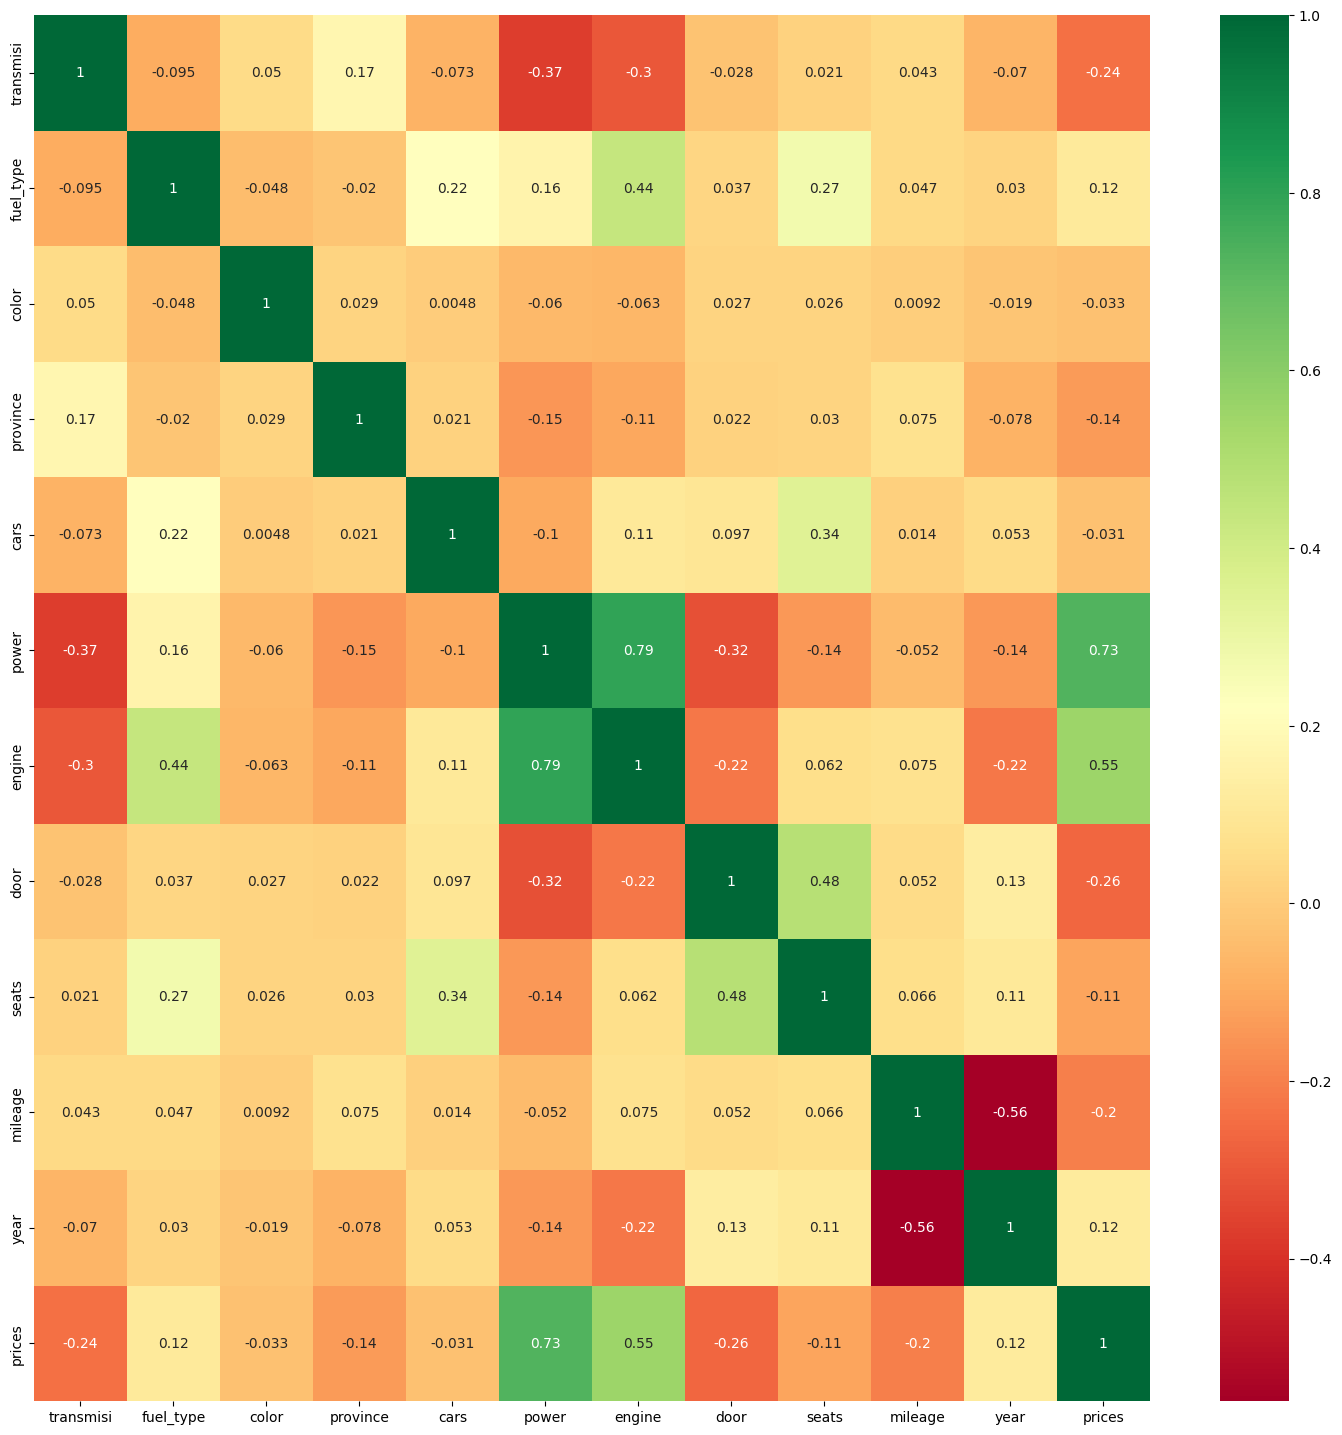

In [70]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

### VIII. <font color=#F0E68C>Split Variable</font>

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization.

In [71]:
ftrain = ['transmisi', 'fuel_type', 'color', 'province', 'cars', 'power',
                'engine', 'door', 'seats', 'mileage', 'year', 'prices']

def Definedata():
    # define dataset
    data2 = final_train[ftrain]
    X = data2.drop(columns=['prices']).values
    y0 = data2['prices'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

### IX. <font color=#F0E68C>Training and Testing</font>

Now, create different functions to calculate deviations, important features and graphical illustration.

In [72]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

### X. <font color=#F0E68C>Build a Models</font>

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [73]:
modelETR = ExtraTreesRegressor(n_estimators=100, random_state=21)
feature1 = ['transmisi', 'fuel_type', 'color', 'province', 'cars', 'power',
                'engine', 'door', 'seats', 'mileage', 'year']

X0 = final_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 25)
modelETR.fit(X_train,y_train)
y_predicted1 = modelETR.predict(X0)

## <font color=palegreen>Conclusion</font>

This Notebook evaluates used-car price prediction which gives the best accuracy of 98.0% for test data and 99.0% for train-data. Being a sophisticated model, ExtraTreesRegressor gives the BEST accuracy in comparison to all prior works using these datasets.

## <font color=palegreen>FastAPI</font>

In [74]:
## Create a Pickle file using serialization
import pickle
pickle_out = open("price_prediction.pkl","wb")
pickle.dump(modelETR, pickle_out)
pickle_out.close()

In [75]:
# TRANSMISI(automatic ,manual); 
# FUEL_TYPE(pertamax, solar, petrol-unleaded, petrol-leaded, diesel, premium); 
# COLOR(Emas, Ungu, Hijau, Marun, Orange, Kuning, Biru, Coklat, Merah, Silver, Abu-abu, Putih, Hitam); 
# PROVINCE(bali, banten, dki jakarta, gorontalo, jambi, jawa barat, jawa tengah, jawa timur, 
# kalimantan barat, kalimantan selatan, kalimantan tengah, kalimantan timur, kepulauan riau, 
# lampung, nusa tenggara barat, riau, sulawesi selatan, sulawesi tengah, sulawesi tenggara, 
# sulawesi utara, sumatera barat, sumatera selatan, sumatera utara); 
# CARS(55 brands); 
# POWER(value); 
# ENGINE(value); DOOR(value); SEATS(value); 
# MILEAGE(value); YEAR(value)

modelETR.predict([[0, 1, 1, 1, 255, 130.00, 1998.00, 5.0, 5.0, 80000.00, 2020]])

array([1094.33613636])